## Introduction to Machine Learning Assignment 3

Submitted by: <br>
Sharan Vijayaragavan <br>
Vishal Ajith Mathew <br>
##### "I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."

## Part 3:

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras import backend as K
from keras.utils.vis_utils import plot_model
import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
(trainx, trainy), (testx,testy) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
np.unique(trainy)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
trainx = trainx.reshape(trainx.shape[0],trainx.shape[1],trainx.shape[2],1)
testx = testx.reshape(testx.shape[0],testx.shape[1],testx.shape[2],1)
trainy= trainy.reshape(-1,1)
testy = testy.reshape(-1,1)

In [5]:
print("Shape of training images:", trainx.shape)
print("Shape of training labels:", trainy.shape)
print("Shape of testing images:", testx.shape)
print("Shape of testing labels:", testy.shape)
print("Number of unique labels in data:", len(np.unique(trainy)))

Shape of training images: (60000, 28, 28, 1)
Shape of training labels: (60000, 1)
Shape of testing images: (10000, 28, 28, 1)
Shape of testing labels: (10000, 1)
Number of unique labels in data: 10


In [6]:
l = ['Top','Trouser','Pullover','Dress','Coat','Sandal',
          'Shirt','Sneaker','Bag','Ankle Boot']

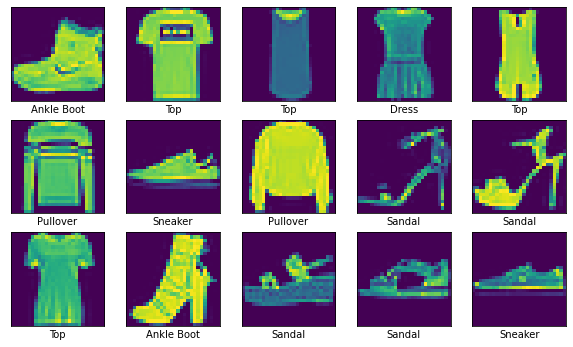

In [7]:
plt.figure(figsize=[10,10])
for i in range(15):    
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainx[i])
    plt.xlabel(l[trainy[i][0]])
plt.show()

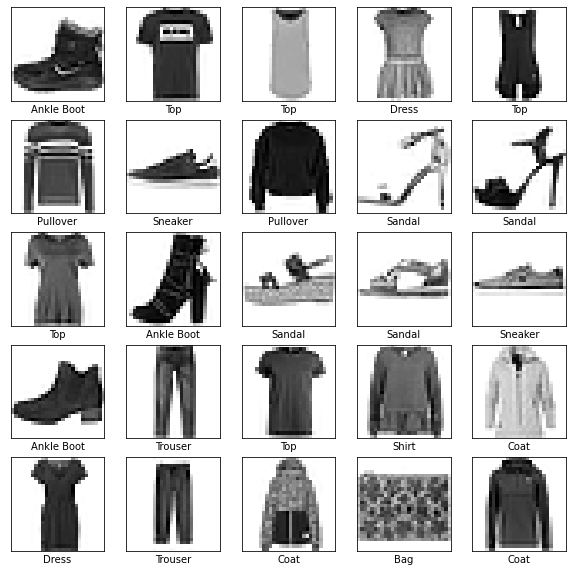

In [8]:
plt.figure(figsize=[10,10])
for i in range(25):    
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainx[i],cmap=plt.cm.binary)
    plt.xlabel(l[trainy[i][0]])
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

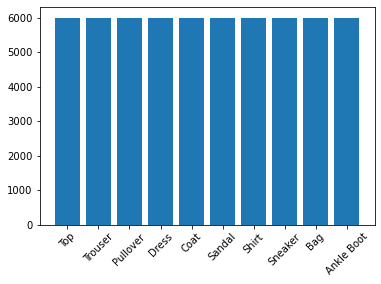

In [9]:
unique, counts = np.unique(trainy, return_counts=True)
plt.bar(l,counts)
plt.xticks(rotation=45)

In [10]:
#Standardizing the images:
trainx = trainx.astype('float32')
testx = testx.astype('float32')
trainx = trainx/255
testx = testx/255
#converting the images train and test to a binary class matrix:
n_c=10
trainy = tf.keras.utils.to_categorical(trainy,n_c,dtype='float32')
testy = tf.keras.utils.to_categorical(testy,n_c,dtype='float32')

In [11]:
i_p = (trainx.shape[1],trainx.shape[2],1)
i_p

(28, 28, 1)

In [12]:
#Creating the model:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, input_shape=i_p, activation='relu', padding='same'))
model.add(Conv2D(filters=16, kernel_size=3, input_shape=i_p, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                    

In [14]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
e_s = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=3)
model_f = model.fit(trainx,trainy,batch_size=100,epochs=7,callbacks=[e_s] ,verbose=2,validation_data=(testx,testy))

Epoch 1/7
600/600 - 59s - loss: 0.5542 - accuracy: 0.7954 - val_loss: 0.3698 - val_accuracy: 0.8625 - 59s/epoch - 98ms/step
Epoch 2/7
600/600 - 61s - loss: 0.3145 - accuracy: 0.8838 - val_loss: 0.3024 - val_accuracy: 0.8899 - 61s/epoch - 102ms/step
Epoch 3/7
600/600 - 57s - loss: 0.2628 - accuracy: 0.9033 - val_loss: 0.2779 - val_accuracy: 0.9002 - 57s/epoch - 96ms/step
Epoch 4/7
600/600 - 59s - loss: 0.2291 - accuracy: 0.9155 - val_loss: 0.2386 - val_accuracy: 0.9128 - 59s/epoch - 98ms/step
Epoch 5/7
600/600 - 62s - loss: 0.2089 - accuracy: 0.9234 - val_loss: 0.2419 - val_accuracy: 0.9146 - 62s/epoch - 103ms/step
Epoch 6/7
600/600 - 60s - loss: 0.1902 - accuracy: 0.9306 - val_loss: 0.2338 - val_accuracy: 0.9207 - 60s/epoch - 100ms/step
Epoch 7/7
600/600 - 58s - loss: 0.1765 - accuracy: 0.9360 - val_loss: 0.2307 - val_accuracy: 0.9177 - 58s/epoch - 97ms/step


313/313 - 3s - loss: 0.2307 - accuracy: 0.9177 - 3s/epoch - 8ms/step
Accuracy on test set for Model:  91.76999926567078 %


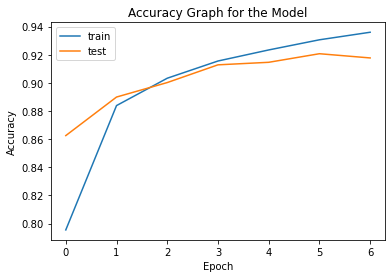

In [15]:
model_e = model.evaluate(testx,testy,verbose = 2)
print("Accuracy on test set for Model: ",model_e[1]*100,"%")
plt.plot(model_f.history['accuracy'])
plt.plot(model_f.history['val_accuracy'])
plt.title('Accuracy Graph for the Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

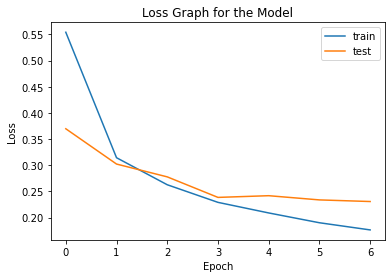

In [16]:
plt.plot(model_f.history['loss'])
plt.plot(model_f.history['val_loss'])
plt.title('Loss Graph for the Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

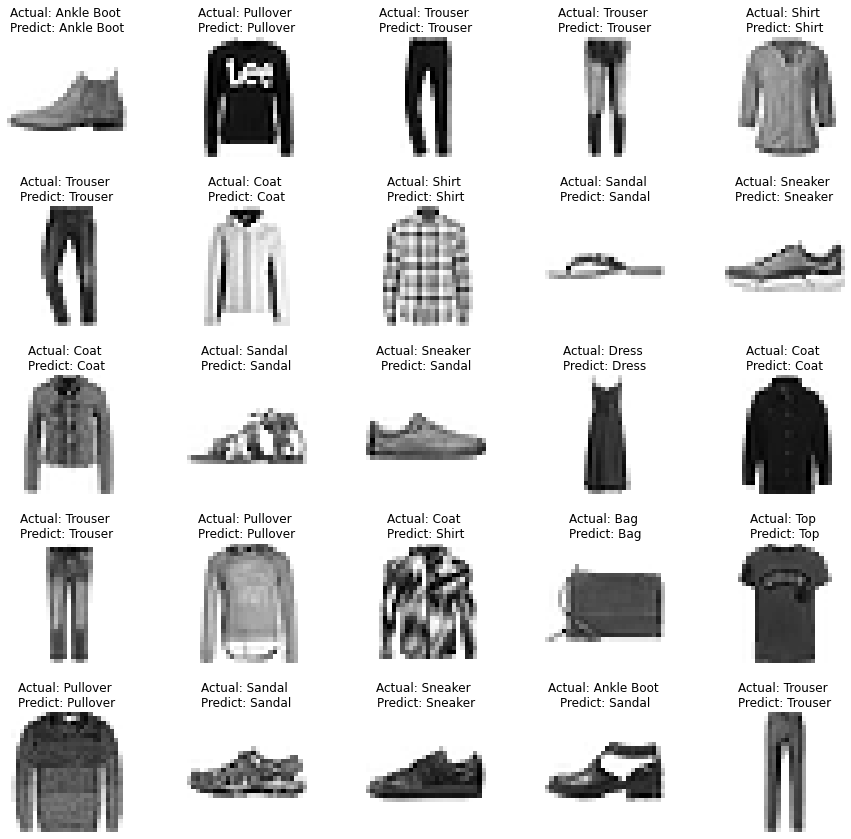

In [17]:
p = model.predict(testx)
p_class = np.argmax(p, axis=1)
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()
for i in np.arange(0, 25):
    axes[i].imshow(testx[i],cmap=plt.cm.binary)
    axes[i].set_title("Actual: %s \nPredict: %s" % (l[np.argmax(testy[i])], l[p_class[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=0.5)

## Part 4:

#### 1. Optimizing CNN model  by varying dropout:

In [18]:
#Callback functions:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
e_s = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=3)

In [19]:
model1_1 = Sequential()
model1_1.add(Conv2D(filters=16, kernel_size=3, input_shape=i_p, activation='relu', padding='same'))
model1_1.add(Conv2D(filters=16, kernel_size=3, input_shape=i_p, activation='relu', padding='same'))
model1_1.add(MaxPool2D(pool_size=2))

model1_1.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model1_1.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model1_1.add(MaxPool2D(pool_size=2))

model1_1.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model1_1.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model1_1.add(MaxPool2D(pool_size=2))

model1_1.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))

model1_1.add(Flatten())
model1_1.add(Dense(512, activation='relu'))
model1_1.add(Dense(512, activation='relu'))
model1_1.add(Dropout(rate=0.7))

model1_1.add(Dense(10, activation='softmax'))
model1_1.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [20]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
model_f1_1 = model1_1.fit(trainx,trainy,batch_size=20,epochs=5,callbacks=[e_s] ,verbose=2,validation_data=(testx,testy))

Epoch 1/5
3000/3000 - 78s - loss: 0.5153 - accuracy: 0.8140 - val_loss: 0.3589 - val_accuracy: 0.8720 - 78s/epoch - 26ms/step
Epoch 2/5
3000/3000 - 78s - loss: 0.3218 - accuracy: 0.8856 - val_loss: 0.3223 - val_accuracy: 0.8832 - 78s/epoch - 26ms/step
Epoch 3/5
3000/3000 - 83s - loss: 0.2840 - accuracy: 0.9002 - val_loss: 0.2996 - val_accuracy: 0.8913 - 83s/epoch - 28ms/step
Epoch 4/5
3000/3000 - 79s - loss: 0.2626 - accuracy: 0.9063 - val_loss: 0.2821 - val_accuracy: 0.8991 - 79s/epoch - 26ms/step
Epoch 5/5
3000/3000 - 79s - loss: 0.2467 - accuracy: 0.9122 - val_loss: 0.2751 - val_accuracy: 0.9040 - 79s/epoch - 26ms/step


In [21]:
model_e1_1 = model1_1.evaluate(testx,testy,verbose = 2)
print("Accuracy on test set for Model: ",model_e1_1[1]*100,"%")


313/313 - 2s - loss: 0.2751 - accuracy: 0.9040 - 2s/epoch - 8ms/step
Accuracy on test set for Model:  90.39999842643738 %


In [22]:
model1_2 = Sequential()
model1_2.add(Conv2D(filters=16, kernel_size=3, input_shape=i_p, activation='relu', padding='same'))
model1_2.add(Conv2D(filters=16, kernel_size=3, input_shape=i_p, activation='relu', padding='same'))
model1_2.add(MaxPool2D(pool_size=2))

model1_2.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model1_2.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model1_2.add(MaxPool2D(pool_size=2))

model1_2.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model1_2.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model1_2.add(MaxPool2D(pool_size=2))

model1_2.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))

model1_2.add(Flatten())
model1_2.add(Dense(512, activation='relu'))
model1_2.add(Dense(512, activation='relu'))
model1_2.add(Dropout(rate=0.15))
model1_2.add(Dense(10, activation='softmax'))
model1_2.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [23]:
model_f1_2 = model1_2.fit(trainx,trainy,batch_size=20,epochs=5,callbacks=[e_s] ,verbose=2,validation_data=(testx,testy))

Epoch 1/5
3000/3000 - 83s - loss: 0.4744 - accuracy: 0.8246 - val_loss: 0.3483 - val_accuracy: 0.8761 - 83s/epoch - 28ms/step
Epoch 2/5
3000/3000 - 81s - loss: 0.2961 - accuracy: 0.8908 - val_loss: 0.3080 - val_accuracy: 0.8947 - 81s/epoch - 27ms/step
Epoch 3/5
3000/3000 - 83s - loss: 0.2604 - accuracy: 0.9067 - val_loss: 0.2756 - val_accuracy: 0.9023 - 83s/epoch - 28ms/step
Epoch 4/5
3000/3000 - 77s - loss: 0.2374 - accuracy: 0.9134 - val_loss: 0.2933 - val_accuracy: 0.8963 - 77s/epoch - 26ms/step
Epoch 5/5
3000/3000 - 78s - loss: 0.2213 - accuracy: 0.9186 - val_loss: 0.2689 - val_accuracy: 0.9060 - 78s/epoch - 26ms/step


In [24]:
model_e1_2 = model1_2.evaluate(testx,testy,verbose = 2)
print("Accuracy on test set for Model: ",model_e1_2[1]*100,"%")

313/313 - 3s - loss: 0.2689 - accuracy: 0.9060 - 3s/epoch - 8ms/step
Accuracy on test set for Model:  90.6000018119812 %


In [25]:
model1_3 = Sequential()
model1_3.add(Conv2D(filters=16, kernel_size=3, input_shape=i_p, activation='relu', padding='same'))
model1_3.add(Conv2D(filters=16, kernel_size=3, input_shape=i_p, activation='relu', padding='same'))
model1_3.add(MaxPool2D(pool_size=2))

model1_3.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model1_3.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model1_3.add(MaxPool2D(pool_size=2))

model1_3.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model1_3.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model1_3.add(MaxPool2D(pool_size=2))

model1_3.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))

model1_3.add(Flatten())
model1_3.add(Dense(512, activation='relu'))
model1_3.add(Dense(256, activation='relu'))
model1_3.add(Dropout(rate=0.45))
model1_3.add(Dense(10, activation='softmax'))
model1_3.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [26]:
model_f1_3 = model1_3.fit(trainx,trainy,batch_size=20,epochs=5,callbacks=[e_s] ,verbose=2,validation_data=(testx,testy))

Epoch 1/5
3000/3000 - 75s - loss: 0.5037 - accuracy: 0.8138 - val_loss: 0.3436 - val_accuracy: 0.8717 - 75s/epoch - 25ms/step
Epoch 2/5
3000/3000 - 76s - loss: 0.3106 - accuracy: 0.8874 - val_loss: 0.3087 - val_accuracy: 0.8892 - 76s/epoch - 25ms/step
Epoch 3/5
3000/3000 - 77s - loss: 0.2716 - accuracy: 0.9025 - val_loss: 0.2989 - val_accuracy: 0.8902 - 77s/epoch - 26ms/step
Epoch 4/5
3000/3000 - 77s - loss: 0.2458 - accuracy: 0.9101 - val_loss: 0.2633 - val_accuracy: 0.9051 - 77s/epoch - 26ms/step
Epoch 5/5
3000/3000 - 78s - loss: 0.2256 - accuracy: 0.9178 - val_loss: 0.2658 - val_accuracy: 0.9090 - 78s/epoch - 26ms/step


In [27]:
model_e1_3 = model1_3.evaluate(testx,testy,verbose = 2)
print("Accuracy on test set for Model: ",model_e1_3[1]*100,"%")

313/313 - 3s - loss: 0.2658 - accuracy: 0.9090 - 3s/epoch - 8ms/step
Accuracy on test set for Model:  90.89999794960022 %


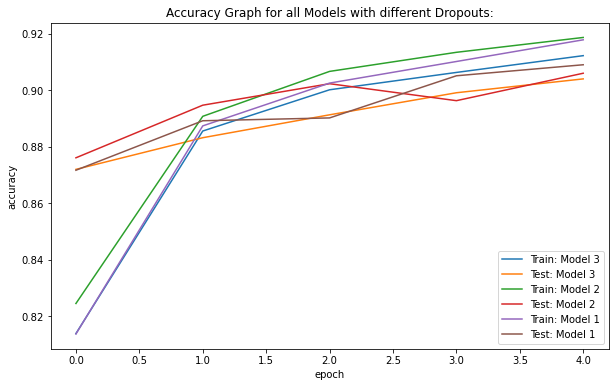

In [28]:
plt.figure(figsize=(10,6))
plt.plot(model_f1_1.history['accuracy'])
plt.plot(model_f1_1.history['val_accuracy'])
plt.plot(model_f1_2.history['accuracy'])
plt.plot(model_f1_2.history['val_accuracy'])
plt.plot(model_f1_3.history['accuracy'])
plt.plot(model_f1_3.history['val_accuracy'])
plt.title('Accuracy Graph for all Models with different Dropouts:')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train: Model 3', 'Test: Model 3','Train: Model 2','Test: Model 2','Train: Model 1','Test: Model 1'], loc='lower right')
plt.show()

#### 2. Optimizing CNN model  by varying Optimizers:

In [29]:
model2_1 = Sequential()
model2_1.add(Conv2D(filters=16, kernel_size=3, input_shape=i_p, activation='relu', padding='same'))
model2_1.add(Conv2D(filters=16, kernel_size=3, input_shape=i_p, activation='relu', padding='same'))
model2_1.add(MaxPool2D(pool_size=2))

model2_1.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model2_1.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model2_1.add(MaxPool2D(pool_size=2))

model2_1.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model2_1.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model2_1.add(MaxPool2D(pool_size=2))

model2_1.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))

model2_1.add(Flatten())
model2_1.add(Dense(512, activation='relu'))
model2_1.add(Dense(512, activation='relu'))
model2_1.add(Dropout(rate=0.45))

model2_1.add(Dense(10, activation='softmax'))

model2_1.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

In [30]:
model_f2_1 = model2_1.fit(trainx,trainy,batch_size=20,epochs=5,callbacks=[e_s] ,verbose=2,validation_data=(testx,testy))

Epoch 1/5
3000/3000 - 79s - loss: 0.9324 - accuracy: 0.6562 - val_loss: 0.5710 - val_accuracy: 0.7873 - 79s/epoch - 26ms/step
Epoch 2/5
3000/3000 - 88s - loss: 0.4854 - accuracy: 0.8230 - val_loss: 0.4394 - val_accuracy: 0.8366 - 88s/epoch - 29ms/step
Epoch 3/5
3000/3000 - 91s - loss: 0.4034 - accuracy: 0.8502 - val_loss: 0.3840 - val_accuracy: 0.8574 - 91s/epoch - 30ms/step
Epoch 4/5
3000/3000 - 81s - loss: 0.3610 - accuracy: 0.8662 - val_loss: 0.3734 - val_accuracy: 0.8631 - 81s/epoch - 27ms/step
Epoch 5/5
3000/3000 - 81s - loss: 0.3332 - accuracy: 0.8768 - val_loss: 0.3368 - val_accuracy: 0.8750 - 81s/epoch - 27ms/step


In [31]:
model_e2_1 = model2_1.evaluate(testx,testy,verbose = 2)
print("Accuracy on test set for Model: ",model_e2_1[1]*100,"%")

313/313 - 3s - loss: 0.3368 - accuracy: 0.8750 - 3s/epoch - 10ms/step
Accuracy on test set for Model:  87.5 %


In [32]:
model2_2 = Sequential()
model2_2.add(Conv2D(filters=16, kernel_size=3, input_shape=i_p, activation='relu', padding='same'))
model2_2.add(Conv2D(filters=16, kernel_size=3, input_shape=i_p, activation='relu', padding='same'))
model2_2.add(MaxPool2D(pool_size=2))

model2_2.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model2_2.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model2_2.add(MaxPool2D(pool_size=2))

model2_2.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model2_2.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model2_2.add(MaxPool2D(pool_size=2))

model2_2.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))

model2_2.add(Flatten())
model2_2.add(Dense(512, activation='relu'))
model2_2.add(Dense(512, activation='relu'))
model2_2.add(Dropout(rate=0.45))

model2_2.add(Dense(10, activation='softmax'))

model2_2.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [33]:
model_f2_2 = model2_2.fit(trainx,trainy,batch_size=20,epochs=5,callbacks=[e_s] ,verbose=2,validation_data=(testx,testy))

Epoch 1/5
3000/3000 - 99s - loss: 0.5251 - accuracy: 0.8103 - val_loss: 0.3941 - val_accuracy: 0.8583 - 99s/epoch - 33ms/step
Epoch 2/5
3000/3000 - 90s - loss: 0.4005 - accuracy: 0.8644 - val_loss: 0.4527 - val_accuracy: 0.8607 - 90s/epoch - 30ms/step
Epoch 3/5
3000/3000 - 90s - loss: 0.6560 - accuracy: 0.8659 - val_loss: 0.5700 - val_accuracy: 0.8693 - 90s/epoch - 30ms/step
Epoch 4/5
3000/3000 - 92s - loss: 0.4220 - accuracy: 0.8649 - val_loss: 0.5401 - val_accuracy: 0.8515 - 92s/epoch - 31ms/step
Epoch 4: early stopping


In [34]:
model_e2_2 = model2_2.evaluate(testx,testy,verbose = 2)
print("Accuracy on test set for Model: ",model_e2_2[1]*100,"%")

313/313 - 3s - loss: 0.5401 - accuracy: 0.8515 - 3s/epoch - 9ms/step
Accuracy on test set for Model:  85.14999747276306 %


In [35]:
model2_3 = Sequential()
model2_3.add(Conv2D(filters=16, kernel_size=3, input_shape=i_p, activation='relu', padding='same'))
model2_3.add(Conv2D(filters=16, kernel_size=3, input_shape=i_p, activation='relu', padding='same'))
model2_3.add(MaxPool2D(pool_size=2))

model2_3.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model2_3.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model2_3.add(MaxPool2D(pool_size=2))

model2_3.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model2_3.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model2_3.add(MaxPool2D(pool_size=2))

model2_3.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))

model2_3.add(Flatten())
model2_3.add(Dense(512, activation='relu'))
model2_3.add(Dense(512, activation='relu'))
model2_3.add(Dropout(rate=0.45))
model2_3.add(Dense(10, activation='softmax'))

model2_3.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [36]:
model_f2_3 = model2_3.fit(trainx,trainy,batch_size=20,epochs=5,callbacks=[e_s] ,verbose=2,validation_data=(testx,testy))

Epoch 1/5
3000/3000 - 83s - loss: 0.4733 - accuracy: 0.8260 - val_loss: 0.3396 - val_accuracy: 0.8744 - 83s/epoch - 28ms/step
Epoch 2/5
3000/3000 - 83s - loss: 0.3023 - accuracy: 0.8897 - val_loss: 0.3960 - val_accuracy: 0.8573 - 83s/epoch - 28ms/step
Epoch 3/5
3000/3000 - 86s - loss: 0.2641 - accuracy: 0.9050 - val_loss: 0.2834 - val_accuracy: 0.9021 - 86s/epoch - 29ms/step
Epoch 4/5
3000/3000 - 82s - loss: 0.2430 - accuracy: 0.9125 - val_loss: 0.2807 - val_accuracy: 0.9025 - 82s/epoch - 27ms/step
Epoch 5/5
3000/3000 - 84s - loss: 0.2268 - accuracy: 0.9189 - val_loss: 0.2594 - val_accuracy: 0.9042 - 84s/epoch - 28ms/step


In [37]:
model_e2_3 = model2_3.evaluate(testx,testy,verbose = 2)
print("Accuracy on test set for Model: ",model_e2_3[1]*100,"%")

313/313 - 3s - loss: 0.2594 - accuracy: 0.9042 - 3s/epoch - 9ms/step
Accuracy on test set for Model:  90.420001745224 %


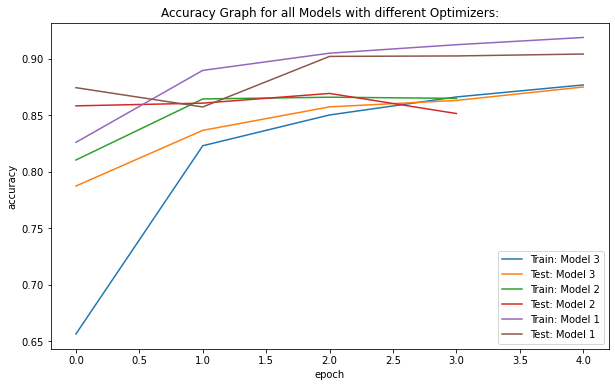

In [38]:
plt.figure(figsize=(10,6))
plt.plot(model_f2_1.history['accuracy'])
plt.plot(model_f2_1.history['val_accuracy'])
plt.plot(model_f2_2.history['accuracy'])
plt.plot(model_f2_2.history['val_accuracy'])
plt.plot(model_f2_3.history['accuracy'])
plt.plot(model_f2_3.history['val_accuracy'])
plt.title('Accuracy Graph for all Models with different Optimizers:')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train: Model 3', 'Test: Model 3','Train: Model 2','Test: Model 2','Train: Model 1','Test: Model 1'], loc='lower right')
plt.show()

#### 3. Optimizing CNN model  by varying kernal sizes:

In [39]:
model3_1 = Sequential()
model3_1.add(Conv2D(filters=16, kernel_size=5, input_shape=i_p, activation='relu', padding='same'))
model3_1.add(Conv2D(filters=16, kernel_size=5, input_shape=i_p, activation='relu', padding='same'))
model3_1.add(MaxPool2D(pool_size=2))

model3_1.add(Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'))
model3_1.add(Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'))
model3_1.add(MaxPool2D(pool_size=2))

model3_1.add(Conv2D(filters=64, kernel_size=5, activation='relu', padding='same'))
model3_1.add(Conv2D(filters=64, kernel_size=5, activation='relu', padding='same'))
model3_1.add(MaxPool2D(pool_size=2))

model3_1.add(Conv2D(filters=128, kernel_size=5, activation='relu', padding='same'))

model3_1.add(Flatten())
model3_1.add(Dense(512, activation='relu'))
model3_1.add(Dense(512, activation='relu'))
model3_1.add(Dropout(rate=0.45))
model3_1.add(Dense(10, activation='softmax'))

model3_1.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [40]:
model_f3_1 = model3_1.fit(trainx,trainy,batch_size=20,epochs=5,callbacks=[e_s] ,verbose=2,validation_data=(testx,testy))

Epoch 1/5
3000/3000 - 173s - loss: 0.5764 - accuracy: 0.7841 - val_loss: 0.3700 - val_accuracy: 0.8666 - 173s/epoch - 58ms/step
Epoch 2/5
3000/3000 - 179s - loss: 0.3337 - accuracy: 0.8803 - val_loss: 0.3118 - val_accuracy: 0.8883 - 179s/epoch - 60ms/step
Epoch 3/5
3000/3000 - 167s - loss: 0.2950 - accuracy: 0.8950 - val_loss: 0.3123 - val_accuracy: 0.8896 - 167s/epoch - 56ms/step
Epoch 4/5
3000/3000 - 165s - loss: 0.2699 - accuracy: 0.9028 - val_loss: 0.3221 - val_accuracy: 0.8860 - 165s/epoch - 55ms/step
Epoch 5/5
3000/3000 - 171s - loss: 0.2545 - accuracy: 0.9098 - val_loss: 0.3353 - val_accuracy: 0.8831 - 171s/epoch - 57ms/step
Epoch 5: early stopping


In [41]:
model_e3_1 = model3_1.evaluate(testx,testy,verbose = 2)
print("Accuracy on test set for Model: ",model_e3_1[1]*100,"%")

313/313 - 5s - loss: 0.3353 - accuracy: 0.8831 - 5s/epoch - 15ms/step
Accuracy on test set for Model:  88.30999732017517 %


In [42]:
model3_2 = Sequential()
model3_2.add(Conv2D(filters=16, kernel_size=2, input_shape=i_p, activation='relu', padding='same'))
model3_2.add(Conv2D(filters=16, kernel_size=2, input_shape=i_p, activation='relu', padding='same'))
model3_2.add(MaxPool2D(pool_size=2))

model3_2.add(Conv2D(filters=32, kernel_size=2, activation='relu', padding='same'))
model3_2.add(Conv2D(filters=32, kernel_size=2, activation='relu', padding='same'))
model3_2.add(MaxPool2D(pool_size=2))

model3_2.add(Conv2D(filters=64, kernel_size=2, activation='relu', padding='same'))
model3_2.add(Conv2D(filters=64, kernel_size=2, activation='relu', padding='same'))
model3_2.add(MaxPool2D(pool_size=2))

model3_2.add(Conv2D(filters=128, kernel_size=2, activation='relu', padding='same'))

model3_2.add(Flatten())
model3_2.add(Dense(512, activation='relu'))
model3_2.add(Dense(512, activation='relu'))
model3_2.add(Dropout(rate=0.45))
model3_2.add(Dense(10, activation='softmax'))

model3_2.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [43]:
model_f3_2 = model3_2.fit(trainx,trainy,batch_size=20,epochs=5,callbacks=[e_s] ,verbose=2,validation_data=(testx,testy))

Epoch 1/5
3000/3000 - 55s - loss: 0.5196 - accuracy: 0.8061 - val_loss: 0.3490 - val_accuracy: 0.8714 - 55s/epoch - 18ms/step
Epoch 2/5
3000/3000 - 53s - loss: 0.3256 - accuracy: 0.8811 - val_loss: 0.3202 - val_accuracy: 0.8851 - 53s/epoch - 18ms/step
Epoch 3/5
3000/3000 - 53s - loss: 0.2812 - accuracy: 0.8983 - val_loss: 0.2906 - val_accuracy: 0.8975 - 53s/epoch - 18ms/step
Epoch 4/5
3000/3000 - 52s - loss: 0.2553 - accuracy: 0.9075 - val_loss: 0.2803 - val_accuracy: 0.8977 - 52s/epoch - 17ms/step
Epoch 5/5
3000/3000 - 53s - loss: 0.2399 - accuracy: 0.9124 - val_loss: 0.2937 - val_accuracy: 0.8992 - 53s/epoch - 18ms/step


In [44]:
model_e3_2 = model3_2.evaluate(testx,testy,verbose = 2)
print("Accuracy on test set for Model: ",model_e3_2[1]*100,"%")

313/313 - 2s - loss: 0.2937 - accuracy: 0.8992 - 2s/epoch - 7ms/step
Accuracy on test set for Model:  89.92000222206116 %


In [45]:
model3_3 = Sequential()
model3_3.add(Conv2D(filters=16, kernel_size=8, input_shape=i_p, activation='relu', padding='same'))
model3_3.add(Conv2D(filters=16, kernel_size=8, input_shape=i_p, activation='relu', padding='same'))
model3_3.add(MaxPool2D(pool_size=2))

model3_3.add(Conv2D(filters=32, kernel_size=8, activation='relu', padding='same'))
model3_3.add(Conv2D(filters=32, kernel_size=8, activation='relu', padding='same'))
model3_3.add(MaxPool2D(pool_size=2))

model3_3.add(Conv2D(filters=64, kernel_size=8, activation='relu', padding='same'))
model3_3.add(Conv2D(filters=64, kernel_size=8, activation='relu', padding='same'))
model3_3.add(MaxPool2D(pool_size=2))

model3_3.add(Conv2D(filters=128, kernel_size=8, activation='relu', padding='same'))

model3_3.add(Flatten())
model3_3.add(Dense(512, activation='relu'))
model3_3.add(Dense(512, activation='relu'))
model3_3.add(Dropout(rate=0.45))
model3_3.add(Dense(10, activation='softmax'))

model3_3.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [46]:
model_f3_3 = model3_3.fit(trainx,trainy,batch_size=20,epochs=5,callbacks=[e_s] ,verbose=2,validation_data=(testx,testy))

Epoch 1/5
3000/3000 - 379s - loss: 0.6471 - accuracy: 0.7597 - val_loss: 0.4594 - val_accuracy: 0.8445 - 379s/epoch - 126ms/step
Epoch 2/5
3000/3000 - 376s - loss: 0.3918 - accuracy: 0.8607 - val_loss: 0.3718 - val_accuracy: 0.8631 - 376s/epoch - 125ms/step
Epoch 3/5
3000/3000 - 376s - loss: 0.3422 - accuracy: 0.8770 - val_loss: 0.3514 - val_accuracy: 0.8714 - 376s/epoch - 125ms/step
Epoch 4/5
3000/3000 - 368s - loss: 0.3130 - accuracy: 0.8873 - val_loss: 0.3321 - val_accuracy: 0.8837 - 368s/epoch - 123ms/step
Epoch 5/5
3000/3000 - 391s - loss: 0.3041 - accuracy: 0.8920 - val_loss: 0.3690 - val_accuracy: 0.8756 - 391s/epoch - 130ms/step


In [47]:
model_e3_3 = model3_3.evaluate(testx,testy,verbose = 2)
print("Accuracy on test set for Model: ",model_e3_3[1]*100,"%")

313/313 - 9s - loss: 0.3690 - accuracy: 0.8756 - 9s/epoch - 29ms/step
Accuracy on test set for Model:  87.55999803543091 %


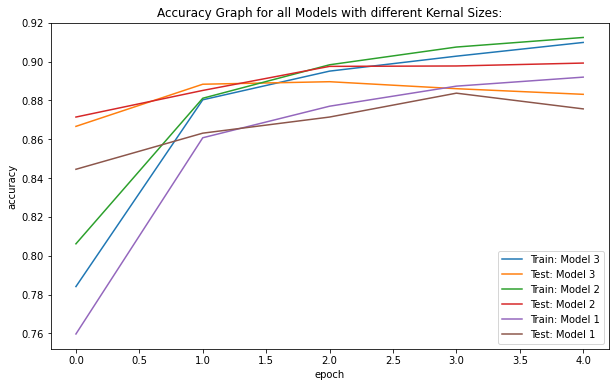

In [59]:
plt.figure(figsize=(10,6))
plt.plot(model_f3_1.history['accuracy'])
plt.plot(model_f3_1.history['val_accuracy'])
plt.plot(model_f3_2.history['accuracy'])
plt.plot(model_f3_2.history['val_accuracy'])
plt.plot(model_f3_3.history['accuracy'])
plt.plot(model_f3_3.history['val_accuracy'])
plt.title('Accuracy Graph for all Models with different Kernal Sizes:')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train: Model 3', 'Test: Model 3','Train: Model 2','Test: Model 2','Train: Model 1','Test: Model 1'], loc='lower right')
plt.show()

#### Data Augmentation:

In [49]:
img_aug = tf.keras.preprocessing.image.ImageDataGenerator(
                      
                            zoom_range=0.15,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            horizontal_flip=True,
                            validation_split=0.2
                            )
img_aug.fit(trainx)

In [50]:
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal"),

    tf.keras.layers.RandomZoom(0.15),
   
  ]
)

In [51]:
tempx = np.append(trainx,trainx,axis=0)
trainx_aug = np.append(tempx,tempx,axis=0)
tempy = np.append(trainy,trainy, axis = 0)
trainy_aug= np.append(tempy,tempy, axis = 0)

In [52]:
print("Shape of the augmented training images:",trainx_aug.shape)
print("Shape of the augmented training labels:",trainy_aug.shape)

Shape of the augmented training images: (240000, 28, 28, 1)
Shape of the augmented training labels: (240000, 10)


In [53]:
model5_1 = Sequential([data_augmentation])
model5_1.add(Conv2D(filters=16, kernel_size=3, input_shape=i_p, activation='relu', padding='same'))
model5_1.add(Conv2D(filters=16, kernel_size=3, input_shape=i_p, activation='relu', padding='same'))
model5_1.add(MaxPool2D(pool_size=2))

model5_1.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model5_1.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model5_1.add(MaxPool2D(pool_size=2))

model5_1.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model5_1.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model5_1.add(MaxPool2D(pool_size=2))

model5_1.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))

model5_1.add(Flatten())
model5_1.add(Dense(512, activation='relu'))
model5_1.add(Dense(512, activation='relu'))
model5_1.add(Dropout(rate=0.45))
model5_1.add(Dense(10, activation='softmax'))

model5_1.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [54]:
model_f5_1 = model5_1.fit(trainx_aug,trainy_aug,batch_size=200,epochs=5,callbacks=[e_s] ,verbose=1,validation_data=(testx,testy))

Epoch 1/5
1200/1200 [==============================] - 230s 191ms/step - loss: 0.4555 - accuracy: 0.8285 - val_loss: 0.2976 - val_accuracy: 0.8911
Epoch 2/5
1200/1200 [==============================] - 215s 179ms/step - loss: 0.2604 - accuracy: 0.9036 - val_loss: 0.2596 - val_accuracy: 0.9070
Epoch 3/5
1200/1200 [==============================] - 217s 180ms/step - loss: 0.2160 - accuracy: 0.9198 - val_loss: 0.2307 - val_accuracy: 0.9194
Epoch 4/5
1200/1200 [==============================] - 231s 193ms/step - loss: 0.1890 - accuracy: 0.9299 - val_loss: 0.2235 - val_accuracy: 0.9216
Epoch 5/5
1200/1200 [==============================] - 232s 194ms/step - loss: 0.1697 - accuracy: 0.9370 - val_loss: 0.2359 - val_accuracy: 0.9245


In [55]:
model_e5_1 = model5_1.evaluate(testx,testy,verbose = 2)
print("Accuracy on test set for Model: ",model_e5_1[1]*100,"%")

313/313 - 3s - loss: 0.2359 - accuracy: 0.9245 - 3s/epoch - 9ms/step
Accuracy on test set for Model:  92.44999885559082 %


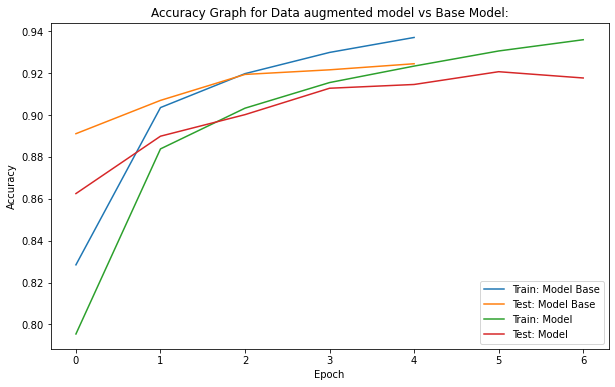

In [56]:
plt.figure(figsize=(10,6))
plt.plot(model_f5_1.history['accuracy'])
plt.plot(model_f5_1.history['val_accuracy'])
plt.plot(model_f.history['accuracy'])
plt.plot(model_f.history['val_accuracy'])
plt.title('Accuracy Graph for Data augmented model vs Base Model:')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train: Model Base','Test: Model Base','Train: Model ','Test: Model '], loc='lower right')
plt.show()

#### References:
####  1.https://www.tensorflow.org/guide/keras/preprocessing_layers#:~:text=The%20Keras%20preprocessing%20layers%20API,part%20of%20a%20Keras%20SavedModel
#### 2. https://github.com/keras-team/keras-io/blob/master/guides/preprocessing_layers.py
#### 3.https://keras.io/api/callbacks/early_stopping/
#### 4.https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
#### 5.https://www.tensorflow.org/tutorials/images/data_augmentation